/content/1_3Zzg_xcOek5dK_MfrCItCg.png

Oren Grabois & Valeriya Gamerman



# Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high.
# Blood glucose is your main source of energy and comes from the food you eat.
# Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.


# ***# Early Signs of Diabetes***


#1-Hunger and fatigue.
#2-Your body converts the food you eat into glucose that your cells use for energy

#3-Peeing more often and being thirstier
#4-Dry mouth and itchy skin
#5-Blurred vision




# ***Variables: :-***

#*Pregnancies: Number of times pregnant
#*Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#*BloodPressure: Diastolic blood pressure (mm Hg)
#*SkinThickness: Triceps skin fold thickness (mm)
#*Insulin: 2-Hour serum insulin (mu U/ml)
#*BMI: Body mass index (weight in kg/(height in m)^2)
#*DiabetesPedigreeFunction: Diabetes pedigree functionr
#*Age: Age (years)
#*Cabin : Cabin Number
#*Outcome: Class variable (0 or 1)

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import io
import matplotlib.pyplot as plt
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().values.any() #check if any null value is present
#data.isna().sum()- onother option

False

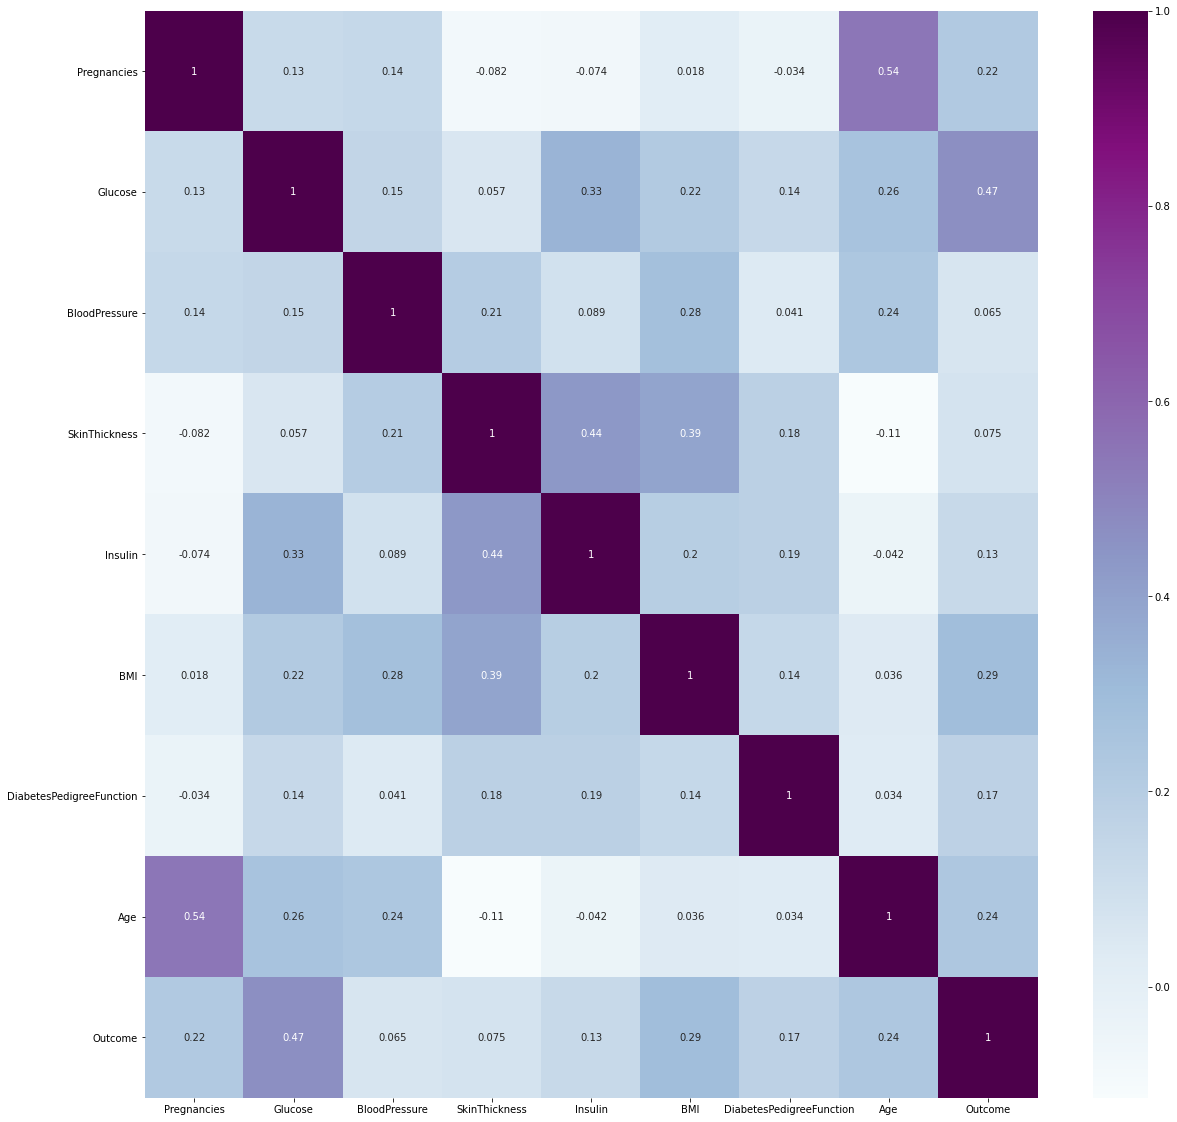

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="BuPu")

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = data[feature_columns].values
y = data[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=10)

In [ ]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 111
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [ ]:
#checking outliers
def Remove_Outlier (feature_columns):
    Q1,Q3 = np.percentile (feature_columns,[25,75])
    
    IQR= Q3-Q1
    
    upper_range =  Q3+(IQR*1.5)
    
    lower_range =  Q1-(IQR*1.5)
    
    return upper_range,lower_range

print("Shape Of The Before Ouliers: ", data.shape)

for i in data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]:
    ur,lr = Remove_Outlier(data[i])
    data[i]= np.where(data[i]>ur,ur,data[i])
    data[i]= np.where(data[i]<lr,lr,data[i])

print("Shape Of The After Ouliers: ", data.shape)

Shape Of The Before Ouliers:  (768, 9)
Shape Of The After Ouliers:  (768, 9)


In [ ]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=100)

random_forest_model.fit(X_train, y_train.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.771


In [ ]:
# The random forest hyperparameters structure
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [2,4]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
# Create the param grid using dictinary
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid )

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 4, verbose=2, n_jobs = 4)
#cv: number of cross-validation you have to try for each selected set of hyperparameters 
#verbose: you can set it to 1 to get the detailed print out while you fit the data
#n_jobs: number of processes you wish to run in parallel 

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   42.8s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1280 out of 1280 | elapsed:  1.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 56}

In [ ]:
print (f'Train Accuracy is : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy is : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy is : 0.820
Test Accuracy is : 0.771


In [ ]:
#getting score using knn method
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train.ravel())
from sklearn.metrics import accuracy_score,confusion_matrix

print("Train Set Accuracy:"+str(accuracy_score(y_train.ravel(),knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test.ravel(),knn.predict(X_test))*100))

Train Set Accuracy:81.77083333333334
Test Set Accuracy:72.65625


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
input_data = (1,85,66,29,0,26.6,0.351,31)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of the test data :  0.7786458333333334
[[7.84910939e+00 2.68510701e+03 8.14574548e+02 2.68859189e+02
  1.50668449e+02 2.19099065e+02 6.08392810e-01 3.85021767e+02]]
[1]
The person is diabetic


In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7682291666666666
Accuracy score of the test data :  0.7786458333333334


In [ ]:
np.size(predictions)

384

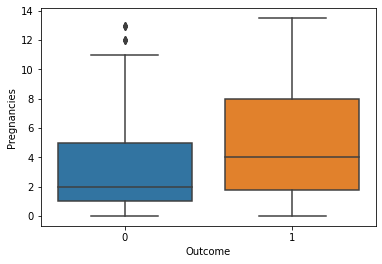

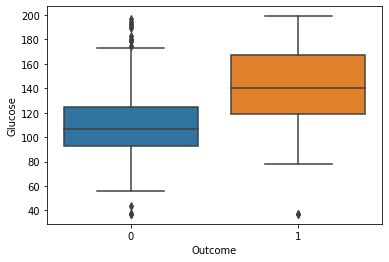

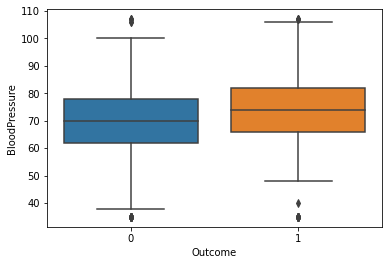

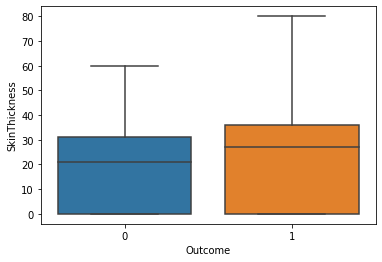

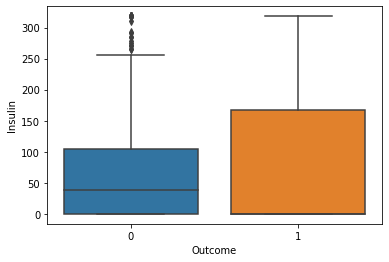

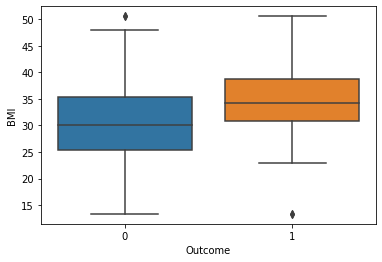

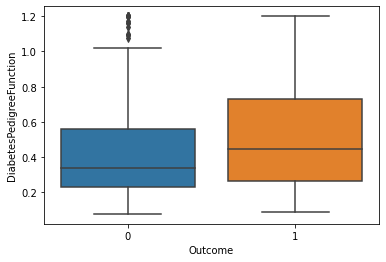

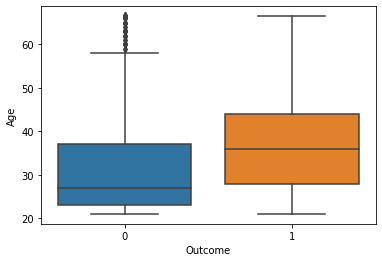

In [ ]:
for i in data.columns:
    if i!='Outcome':
        sns.boxplot(x = data["Outcome"],y=data[i])
        plt.show()

<Figure size 1440x1440 with 0 Axes>

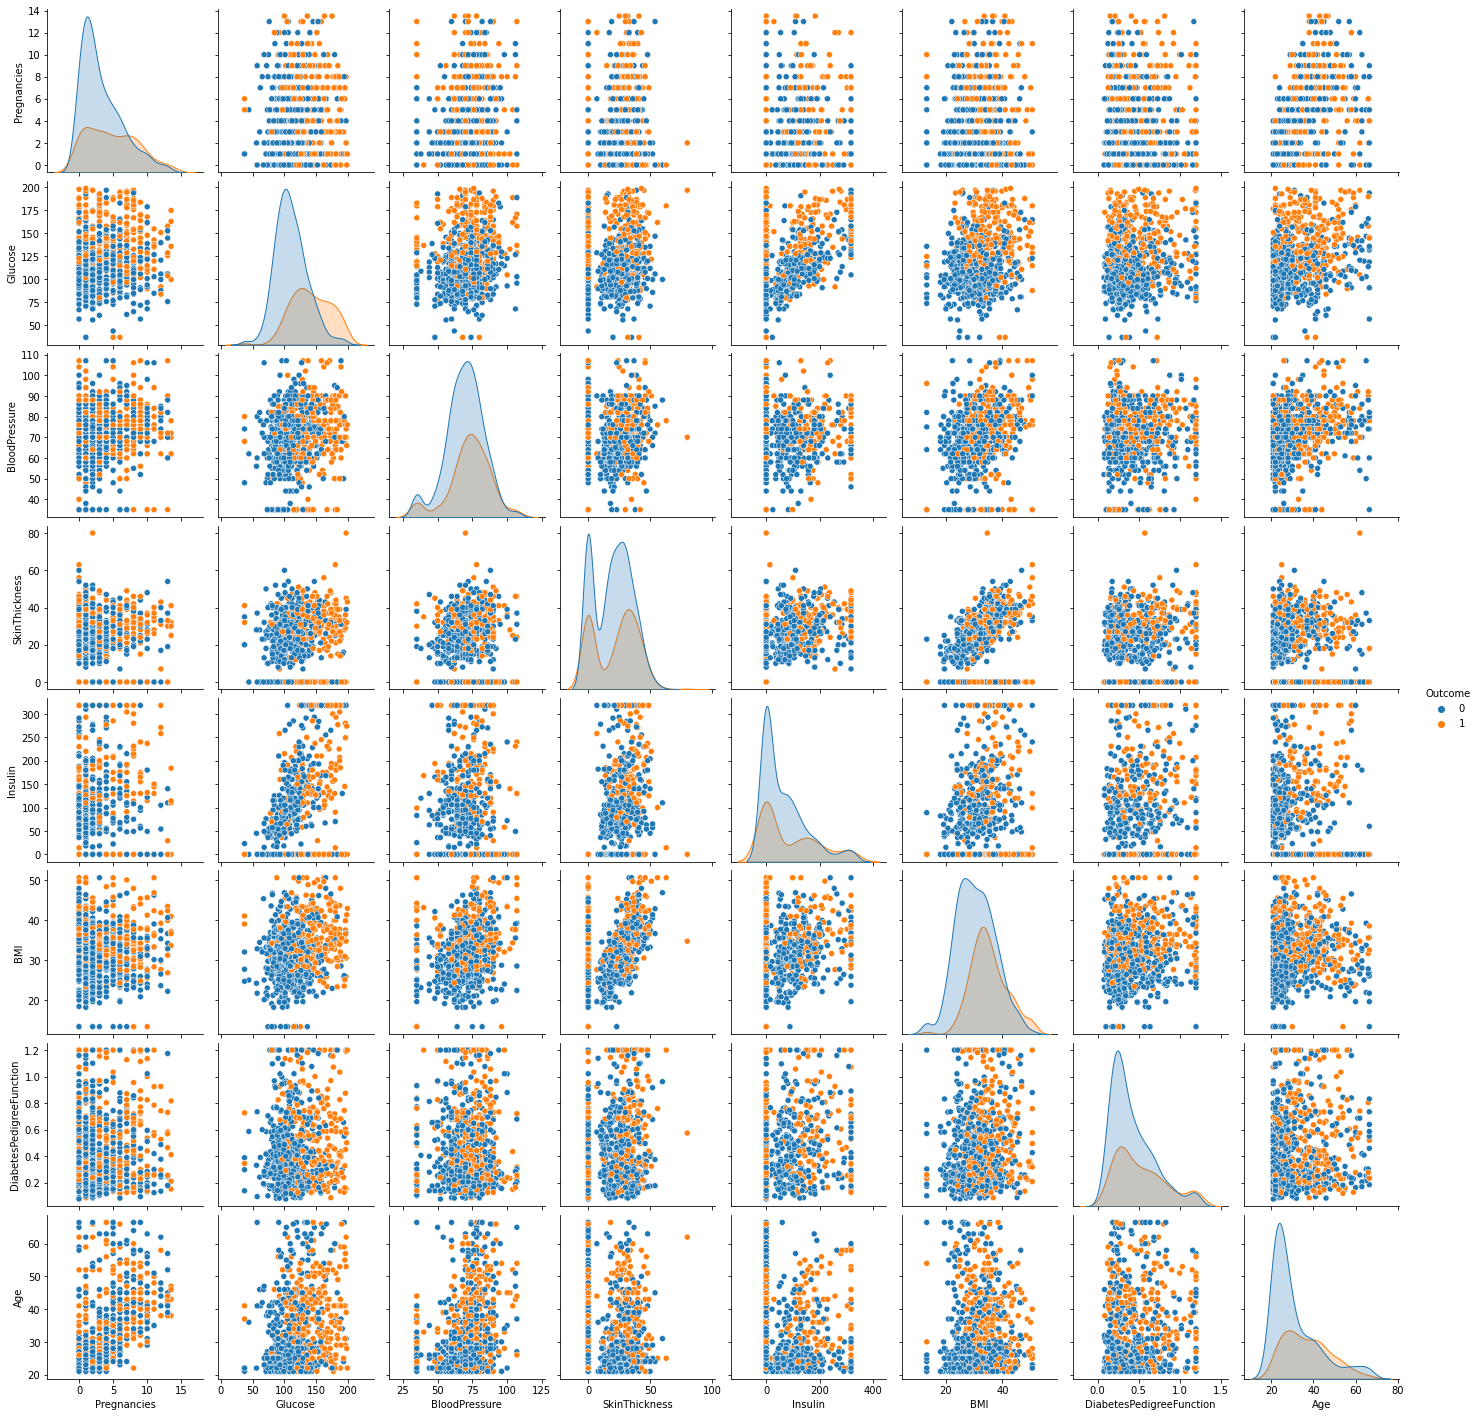

In [ ]:
plt.figure(figsize=(20,20
                   ))
sns.pairplot(data,hue = "Outcome")

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [ ]:
data.var()

Pregnancies                   11.183383
Glucose                      972.658181
BloodPressure                201.561597
SkinThickness                251.055925
Insulin                     8756.473117
BMI                           49.696630
DiabetesPedigreeFunction       0.081565
Age                          135.219778
Outcome                        0.227483
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


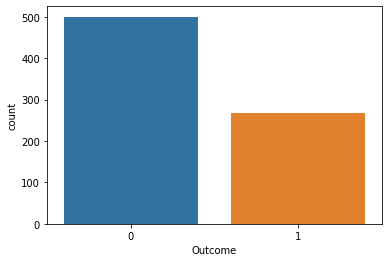

In [ ]:
sns.countplot(data["Outcome"])


In [ ]:

#Outcome= pd.DataFrame({'Actual': y_test, 'Predicted': y_train}.reset_index())
#Outcome

SyntaxError: ignored